In [8]:
import matplotlib.pyplot as plt
import pandas as pd


In [9]:
df = pd.read_csv(r'C:\Dev\inteligencia-artificial\telco.csv',sep=',')

- A fixa etária do cliente tem um forte associação como churn
- Um cliente com menos de 6 meses de contrato é mais propenso ao churn
- Cliente com contrato mensal é mais proenso ao churn 

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [66]:
#contar clientes utilizando a variável churn com 
df.Churn.value_counts()

Churn
Stayed     5174
Churned    1869
Name: count, dtype: int64

In [54]:
#como identificar um valores passíveis (único) numa variárel 
df.Churn.unique()

array(['Stayed', 'Churned'], dtype=object)

In [55]:
#Não consegui mudar o valor 
# novo = {'Stayed':'yes', 'Churned':'no'}
#df['Churn'].map(novo),(inplace=True)

In [67]:
#Como é a distribuição do cliente em precentual 
df.Churn.value_counts(normalize=True)

Churn
Stayed     0.73463
Churned    0.26537
Name: proportion, dtype: float64

[Text(0, 0, '5174'), Text(0, 0, '1869')]

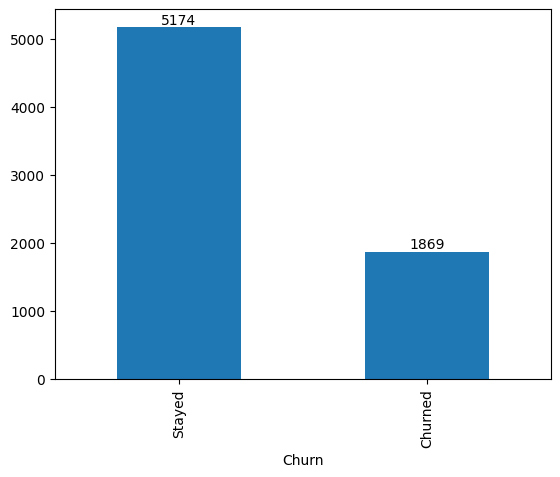

In [70]:
ax =df.Churn.value_counts().plot.bar()
ax.bar_label(ax.containers[0])

[Text(0, 0, '0.73463'), Text(0, 0, '0.26537')]

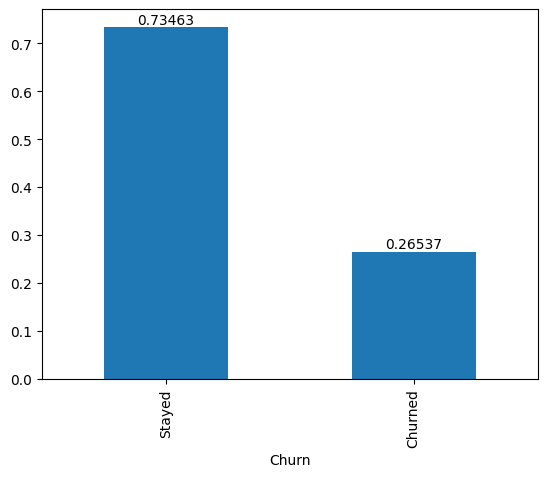

In [72]:
ax =df.Churn.value_counts(normalize=True).plot.bar()
ax.bar_label(ax.containers[0])

In [74]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

[Text(0, 0, '0.550192'), Text(0, 0, '0.240664'), Text(0, 0, '0.209144')]

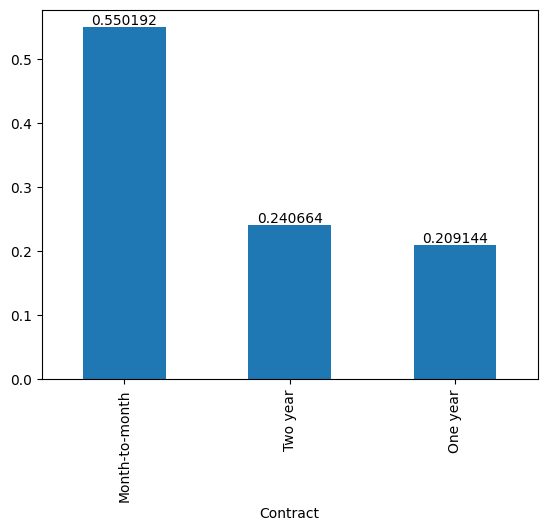

In [75]:
ax =df.Contract.value_counts(normalize=True).plot.bar()
ax.bar_label(ax.containers[0])

<Axes: ylabel='Frequency'>

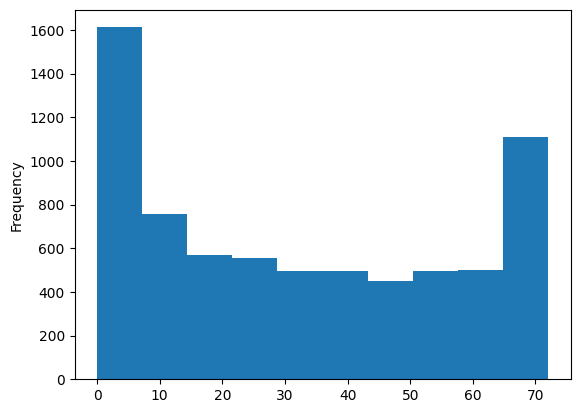

In [88]:
df.tenure.plot.hist()

- Avariavel tempo de contrato (tenure)não apresenta visualmente um distribuição normal 
- A grande parte dos valores se contram, no extremos, ou seja , contratos com pouco meses de ativação ,
e contratos logos, acima aproximadamete dos 65 meses

<Axes: ylabel='Frequency'>

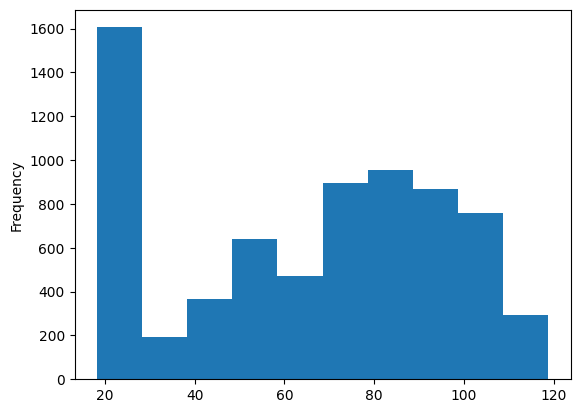

In [89]:
#
df.MonthlyCharges.plot.hist()

In [90]:
#medida de possição - tempo medio de contrato
df.tenure.mean()

np.float64(32.37114865824223)

In [91]:
#Medida de posição- mediana tempo de contrato
df.tenure.median()

np.float64(29.0)

In [92]:
#Medida de posição - mode do tempo de contrato
df.tenure.mode()

0    1
Name: tenure, dtype: int64

In [93]:
#Medidas dispersão - Desvio Padrão tempo de contrato.
df.tenure.std()

np.float64(24.55948102309446)

In [99]:
#Medida de dispersão - coeficiente de variação
df.tenure.std() /df.tenure.mean() *100


np.float64(75.86842617906674)

In [ ]:
#quandos contratos pssssuem 1 mes de contrato filtro 
#df.Churn[df.tenure ==1] filtra a quantidade 
len(df.Churn[df.tenure ==1]) #contar

In [100]:
#quando o valor em porcentagem
len(df.Churn[df.tenure ==1]) / len(df.Churn) *100

8.70367741019452

In [102]:
#filtra em 1 a 6 meses de contrato
len(df.Churn[(df.tenure >=1) & (df.tenure<=6)])

1470

In [106]:
len(df.Churn[(df.gender =='Male') & (df.tenure<=6)])

746

In [112]:
df.groupby(['Churn'])['tenure'].count()

Churn
Churned    1869
Stayed     5174
Name: tenure, dtype: int64

In [114]:
df.groupby(['tenure'])['tenure'].count().sort_values(ascending=False)

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

<Axes: ylabel='tenure'>

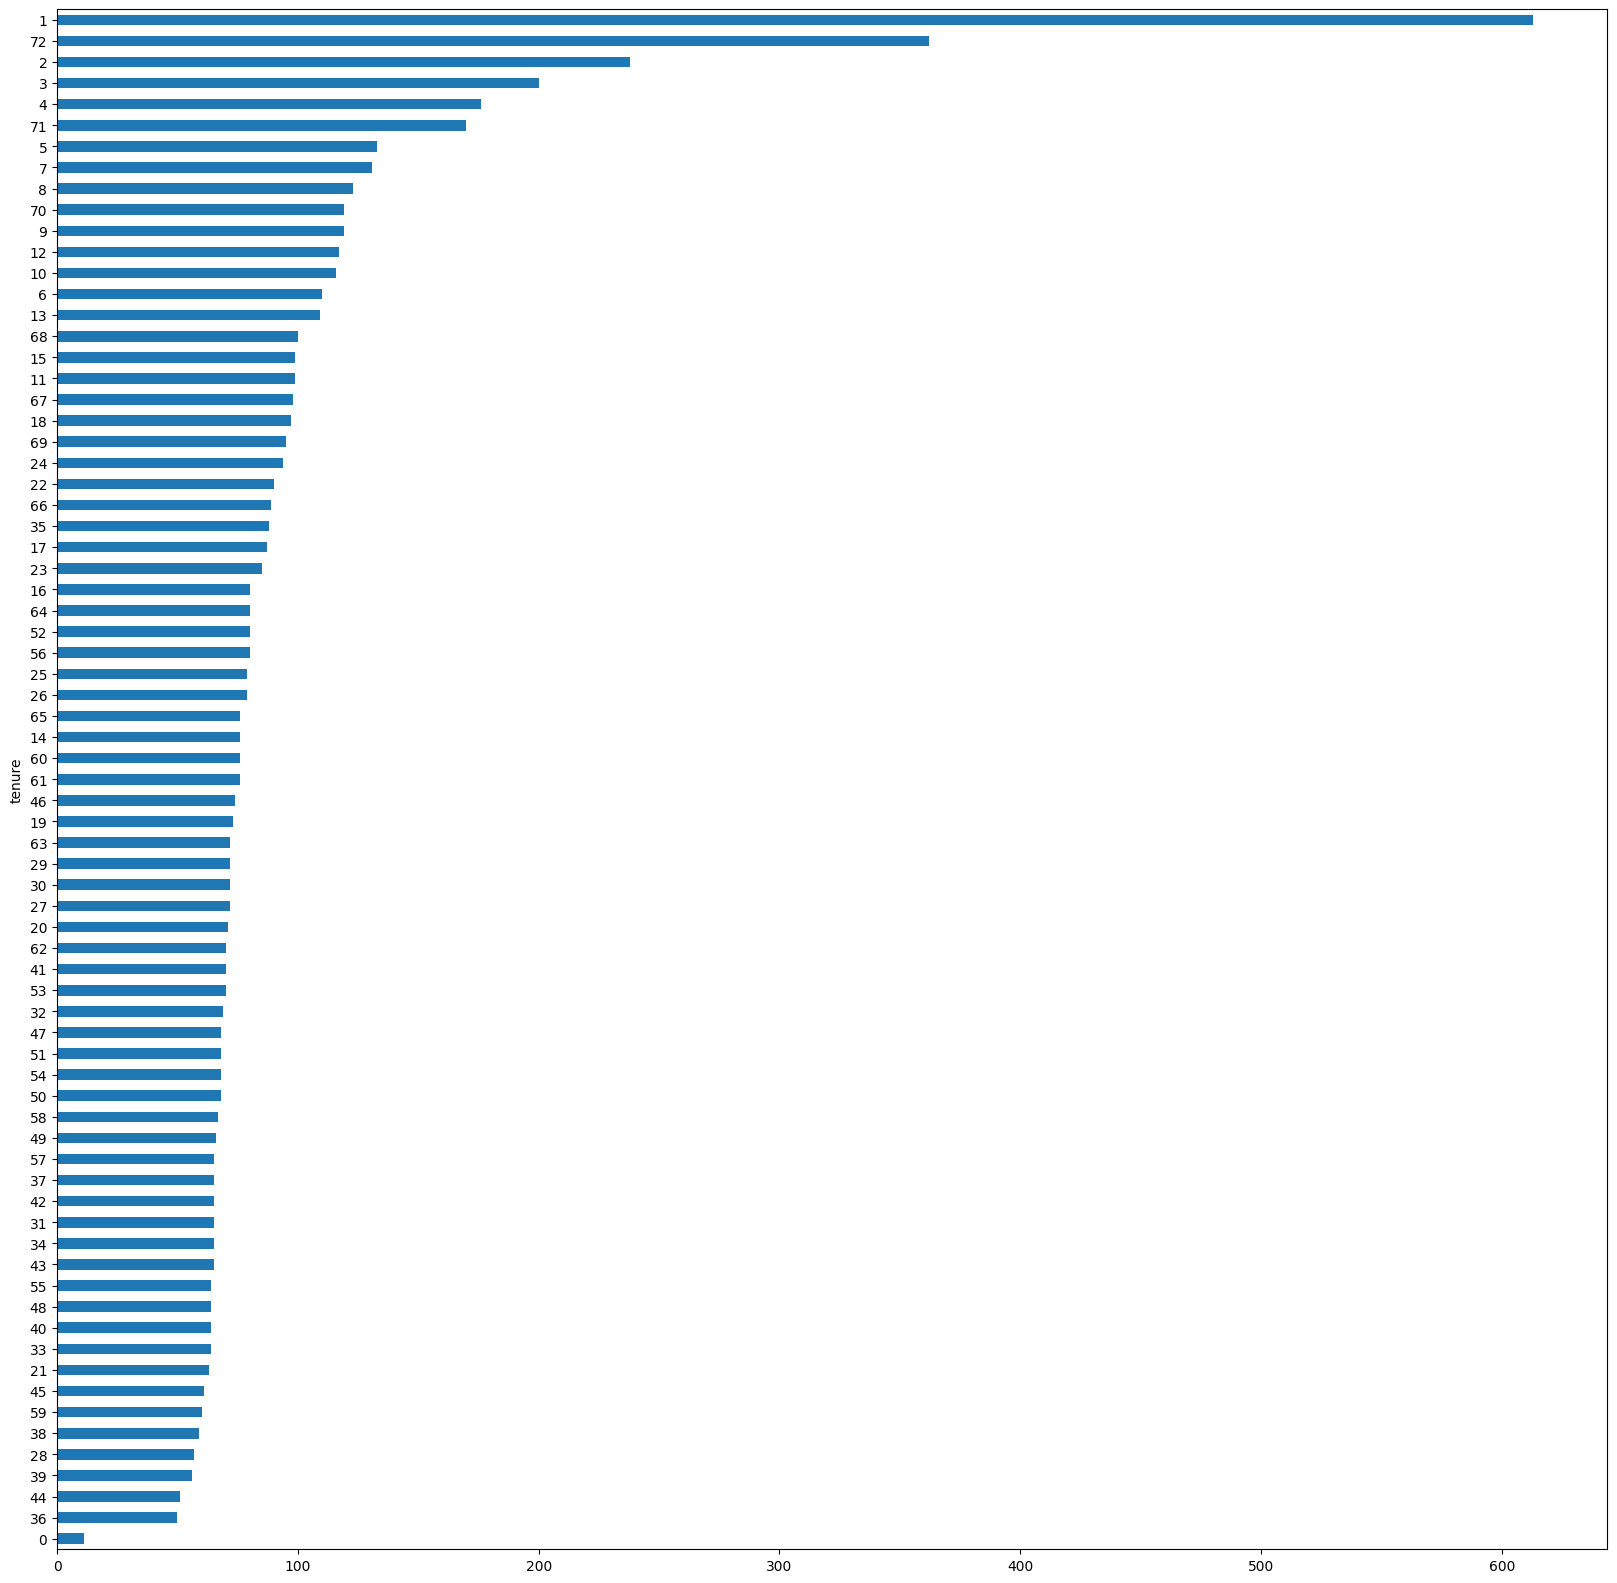

In [13]:
df.groupby(['tenure'])['tenure'].count().sort_values().plot.barh(figsize=(20,20))
